In [255]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'substen']

#vips: 1skelton, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']




# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
6,71,123,26789.0,26839.0
16,72,105,21201.0,21345.0
21,73,100,19778.0,19854.0
31,74,92,18277.0,18507.0
71,75,48,8626.0,9082.0
29,76,92,20638.0,20950.0
65,77,68,14667.0,14994.0
28,78,93,20067.0,20128.0
22,79,97,18348.0,18445.0
19,80,103,21837.0,22263.0


In [256]:
data2['user'].max()

'StreamElements'

In [257]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
76,76,92,20638.0,20950.0
77,77,68,14667.0,14994.0
78,78,93,20067.0,20128.0
79,79,97,18348.0,18445.0
80,80,103,21837.0,22263.0


In [258]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,81.000000,81.000000,81.000000,81.000000
mean,40.000000,85.308642,18356.222222,18504.851852
std,23.526581,28.068952,5181.407451,5174.188971
min,0.000000,9.000000,5224.000000,5257.000000
25%,20.000000,76.000000,16460.000000,16563.000000
50%,40.000000,87.000000,18329.000000,18477.000000
75%,60.000000,103.000000,21093.000000,21235.000000
max,80.000000,161.000000,36049.000000,36105.000000


In [259]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,16,16813.0,17697.0,4.670278,4.915833
1,1,14,17693.0,17831.0,4.914722,4.953056
2,2,9,19122.0,19147.0,5.311667,5.318611
3,3,70,17351.0,17451.0,4.819722,4.847500
4,4,86,18644.0,18734.0,5.178889,5.203889


In [260]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,16,16813.0,17697.0,4.670278,4.915833,95.004803
1,1,14,17693.0,17831.0,4.914722,4.953056,99.226067
2,2,9,19122.0,19147.0,5.311667,5.318611,99.869431
3,3,70,17351.0,17451.0,4.819722,4.847500,99.426967
4,4,86,18644.0,18734.0,5.178889,5.203889,99.519590
5,5,95,20339.0,20382.0,5.649722,5.661667,99.789030
6,6,76,16460.0,16563.0,4.572222,4.600833,99.378132
7,7,83,17415.0,17773.0,4.837500,4.936944,97.985709
8,8,121,18389.0,18686.0,5.108056,5.190556,98.410575
9,9,95,16153.0,16418.0,4.486944,4.560556,98.385918


In [261]:
stream_stats['persenteg'].describe()

count     81.000000
mean      99.111518
std        0.942303
min       94.979079
25%       98.813754
50%       99.345955
75%       99.723790
max      100.000000
Name: persenteg, dtype: float64

In [262]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
75,75,48,8626.0,9082.0,2.396111,2.522778,94.979079
0,0,16,16813.0,17697.0,4.670278,4.915833,95.004803
19,19,33,7238.0,7430.0,2.010556,2.063889,97.415882
27,27,92,17976.0,18435.0,4.993333,5.120833,97.510171
45,45,57,9092.0,9311.0,2.525556,2.586389,97.647943
32,32,45,8463.0,8658.0,2.350833,2.405000,97.747748
77,77,68,14667.0,14994.0,4.074167,4.165000,97.819128
47,47,103,24031.0,24561.0,6.675278,6.822500,97.842107
7,7,83,17415.0,17773.0,4.837500,4.936944,97.985709
80,80,103,21837.0,22263.0,6.065833,6.184167,98.086511


In [263]:
stream_stats['watch_length_in_hour'].sum() /24

17.208958333333335

In [264]:


stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
75,75,48,8626.0,9082.0,2.396111,2.522778,94.979079
0,0,16,16813.0,17697.0,4.670278,4.915833,95.004803
19,19,33,7238.0,7430.0,2.010556,2.063889,97.415882
27,27,92,17976.0,18435.0,4.993333,5.120833,97.510171
45,45,57,9092.0,9311.0,2.525556,2.586389,97.647943
32,32,45,8463.0,8658.0,2.350833,2.405000,97.747748
77,77,68,14667.0,14994.0,4.074167,4.165000,97.819128
47,47,103,24031.0,24561.0,6.675278,6.822500,97.842107
7,7,83,17415.0,17773.0,4.837500,4.936944,97.985709
80,80,103,21837.0,22263.0,6.065833,6.184167,98.086511


In [265]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
16,16,91,18553.0,18574.0,5.153611,5.159444,99.886939
64,64,86,18492.0,18507.0,5.136667,5.140833,99.918950
25,25,92,20896.0,20910.0,5.804444,5.808333,99.933046
53,53,136,29413.0,29431.0,8.170278,8.175278,99.938840
58,58,76,17435.0,17445.0,4.843056,4.845833,99.942677
12,12,88,20468.0,20477.0,5.685556,5.688056,99.956048
24,24,123,26365.0,26365.0,7.323611,7.323611,100.000000
66,66,82,18147.0,18147.0,5.040833,5.040833,100.000000
30,30,47,10681.0,10681.0,2.966944,2.966944,100.000000
31,31,89,18576.0,18576.0,5.160000,5.160000,100.000000


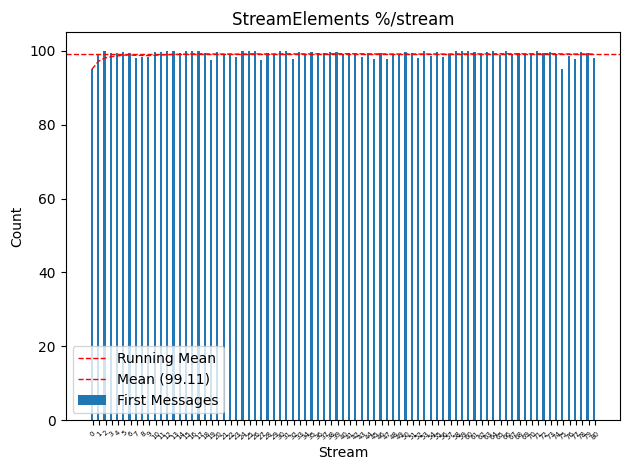

In [266]:
import matplotlib.pyplot as plt

stream_stats = stream_stats.sort_values(by='stream')

# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() +' %/stream', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(stream_stats['stream'], fontsize=5)  # Adjust x-tick labels font size
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()
